In [1]:
from lsst.sims.featureScheduler.modelObservatory import Model_observatory, dummy_time_handler
import numpy as np
from lsst.sims.almanac import Almanac
from lsst.sims.cloudModel import CloudModel
%matplotlib inline
import matplotlib.pylab as plt
from scipy.stats import binned_statistic

In [2]:
observatory = Model_observatory()

In [3]:
observatory.scheduledDowntime_model.downtimes
# night, number of nights down, reason

[(158, 7, 'general maintenance'),
 (307, 7, 'general maintenance'),
 (523, 7, 'general maintenance'),
 (672, 7, 'general maintenance'),
 (888, 14, 'recoat mirror'),
 (1253, 7, 'general maintenance'),
 (1402, 7, 'general maintenance'),
 (1618, 14, 'recoat mirror'),
 (1983, 7, 'general maintenance'),
 (2132, 7, 'general maintenance'),
 (2348, 14, 'recoat mirror'),
 (2713, 7, 'general maintenance'),
 (2862, 7, 'general maintenance'),
 (3078, 14, 'recoat mirror'),
 (3443, 7, 'general maintenance'),
 (3592, 7, 'general maintenance'),
 (3808, 14, 'recoat mirror'),
 (4173, 7, 'general maintenance'),
 (4322, 7, 'general maintenance'),
 (4538, 14, 'recoat mirror'),
 (4903, 7, 'general maintenance'),
 (5052, 7, 'general maintenance'),
 (5268, 14, 'recoat mirror'),
 (5633, 7, 'general maintenance'),
 (5782, 7, 'general maintenance'),
 (5998, 14, 'recoat mirror'),
 (6363, 7, 'general maintenance'),
 (6512, 7, 'general maintenance'),
 (6728, 14, 'recoat mirror'),
 (7093, 7, 'general maintenance'),


In [4]:
observatory.unscheduledDowntime_model.downtimes
# night, number of nights down, reason

[(48, 3, 'intermediate event'),
 (127, 1, 'minor event'),
 (230, 1, 'minor event'),
 (233, 1, 'minor event'),
 (299, 1, 'minor event'),
 (355, 1, 'minor event'),
 (386, 7, 'major event'),
 (397, 1, 'minor event'),
 (413, 1, 'minor event'),
 (507, 1, 'minor event'),
 (530, 1, 'minor event'),
 (552, 1, 'minor event'),
 (649, 1, 'minor event'),
 (748, 3, 'intermediate event'),
 (792, 3, 'intermediate event'),
 (872, 1, 'minor event'),
 (1051, 7, 'major event'),
 (1060, 1, 'minor event'),
 (1161, 1, 'minor event'),
 (1163, 3, 'intermediate event'),
 (1203, 1, 'minor event'),
 (1232, 1, 'minor event'),
 (1307, 3, 'intermediate event'),
 (1337, 1, 'minor event'),
 (1396, 1, 'minor event'),
 (1411, 3, 'intermediate event'),
 (1444, 1, 'minor event'),
 (1465, 3, 'intermediate event'),
 (1626, 1, 'minor event'),
 (1650, 1, 'minor event'),
 (1916, 7, 'major event'),
 (2046, 1, 'minor event'),
 (2218, 1, 'minor event'),
 (2262, 1, 'minor event'),
 (2383, 3, 'intermediate event'),
 (2396, 3, 'inte

In [5]:
observatory.down_nights

[48,
 49,
 50,
 127,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 230,
 233,
 299,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 355,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 397,
 413,
 507,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 552,
 649,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 748,
 749,
 750,
 792,
 793,
 794,
 872,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1060,
 1161,
 1163,
 1164,
 1165,
 1203,
 1232,
 1253,
 1254,
 1255,
 1256,
 1257,
 1258,
 1259,
 1307,
 1308,
 1309,
 1337,
 1396,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1411,
 1412,
 1413,
 1444,
 1465,
 1466,
 1467,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1650,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 2046,
 2132,
 2133,
 2134,
 2135,
 2136,
 2137,
 2138,
 2218,
 2262,
 2348,
 2349,
 2350,
 2

In [6]:
print('total number of down nights (not including weather)', np.size(observatory.down_nights))

total number of down nights (not including weather) 595


In [7]:
mjd_start=59853.5
almanac = Almanac(mjd_start=mjd_start)
dth = dummy_time_handler(mjd_start)
cloud_model = CloudModel(dth)
cloud_model.read_data()
        # XXX-argle bargle, really?!?!?
cloud_model.offset = 0

In [9]:
mjds = np.arange(mjd_start, mjd_start+365.25*10, 1/24/2.)

In [10]:
indx = almanac.mjd_indx(mjds)

In [11]:
sun_moon_info = almanac.get_sun_moon_positions(mjds)

In [12]:
good = np.where(sun_moon_info['sun_alt'] < np.radians(-18.))


In [13]:
delta_t = (mjds[good]-mjd_start)*24.*3600.
clouds = [cloud_model.get_cloud(x) for x in delta_t]

In [48]:
cloud_limit = 0.3
t_lost = mjds[good]*0
t_lost[np.where(np.array(clouds) >= cloud_limit)] = 0.5
t_open = t_lost*0
t_open[np.where(np.array(clouds) < cloud_limit)] = 0.5

In [49]:
np.sum(t_lost)/np.sum(t_open)

0.402973710369916

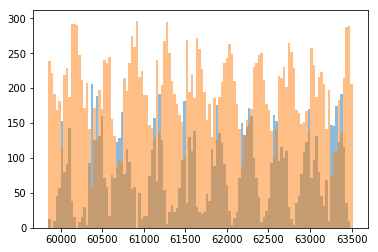

In [50]:
bins = np.arange(mjd_start, mjd_start+365.25*10+30, 30)
ack = plt.hist(mjds[good], weights=t_lost, bins=bins, alpha=0.5)
ack = plt.hist(mjds[good], weights=t_open, bins=bins, alpha=0.5)

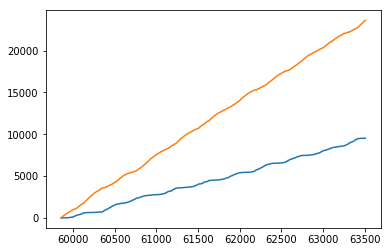

In [51]:
plt.plot(mjds[good], np.cumsum(t_lost))
plt.plot(mjds[good], np.cumsum(t_open))

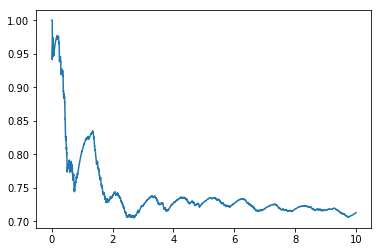

In [52]:
plt.plot((mjds[good]-mjd_start)/365.25, np.cumsum(t_open)/(np.cumsum(t_open)+np.cumsum(t_lost)))

In [53]:
lost, bins, bn = binned_statistic(mjds[good], t_lost, bins=bins, statistic='sum')
obs, bins, bn = binned_statistic(mjds[good], t_open, bins=bins, statistic='sum')

In [54]:
lost

array([ 12. ,   0. ,  10. ,  45.5,  56.5, 152.5,  80. ,  91. , 143. ,
        38. ,  15. ,   0. ,   9. ,  15.5,  29.5,   3.5,  92.5, 206.5,
       125. , 188.5, 132. , 160. ,  71. ,  58. ,  17.5,  76. ,  72. ,
       122.5, 128.5, 166. ,  77. , 113.5,  93.5,  55. ,  58. ,   0. ,
        50.5,  12.5,  17.5,  17.5,  74. , 112. , 156.5,  66.5, 192. ,
       126. ,  54. ,   5. ,  22.5,  32.5,  22. ,  28. ,  57. ,  97. ,
       181. ,  35. , 130.5, 110. , 139. ,  30. ,  23. ,  20. ,  23. ,
        48. ,  39. , 112.5,  88. , 175.5, 135.5, 121. ,  92. ,  61. ,
        23.5,   4.5,  13.5,  23. ,  71. , 150. , 133.5, 144. , 171. ,
       159.5,  99.5,  71. ,  44. ,   8. ,  16. ,  23.5,  42. ,  92.5,
       161. , 153. ,  95. , 115.5,  99.5, 110.5,  30. ,  12.5,   4. ,
        35. ,  45.5,  77. , 108. , 122.5, 170.5,  71.5,  97.5, 131. ,
        80.5,  45. ,  31.5,  68. ,  10. , 146.5, 145.5, 174. , 122.5,
       191. , 115.5,  36. ,  10. ,   0. ])

In [55]:
obs

array([239. , 222. , 191. , 168.5, 182. , 116. , 219. , 229. , 187. ,
       291.5, 291.5, 290. , 247.5, 211.5, 171. , 208. , 141. ,  57. ,
       171.5, 126.5, 198. , 170. , 240. , 235.5, 244. , 156. , 131. ,
        87.5,  98.5,  94.5, 214.5, 195.5, 236.5, 275. , 258.5, 296.5,
       216.5, 224.5, 190. , 190.5, 147. , 143.5, 129. , 240. , 135.5,
       204. , 268. , 294. , 250. , 209.5, 191. , 177.5, 161.5, 151. ,
        99.5, 269. , 194.5, 220. , 186. , 272. , 256. , 227. , 195. ,
       155. , 177. , 130. , 185.5, 126. , 187. , 209. , 235.5, 243.5,
       262.5, 248.5, 210.5, 177. , 142. ,  87.5, 133.5, 154.5, 147. ,
       170.5, 230.5, 236.5, 247.5, 250.5, 212. , 177.5, 168.5, 139. ,
       101.5, 142. , 218. , 214.5, 230.5, 202. , 264.5, 251. , 229. ,
       169. , 164.5, 148. , 151.5, 167. , 138. , 258. , 232.5, 187. ,
       216.5, 223.5, 206.5, 141. , 197.5,  74. , 108.5, 110.5, 183.5,
       136. , 214.5, 287. , 289.5, 205.5])

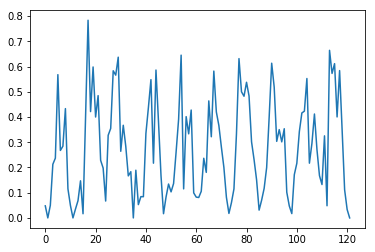

In [56]:
plt.plot(lost/(lost+obs))


In [57]:
np.sum(t_lost)/10.

952.65

In [58]:
# Just reading from Gemini
from_plot = 100+90+60+25+40+40+40+60+140+160+160
from_plot

915

In [59]:
np.unique(clouds)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])